In [1]:
from InterOptimus.itworker import InterfaceWorker
from pymatgen.core.structure import Structure
from mp_api.client import MPRester

In [2]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [3]:
with MPRester('fFtrdShVJH4jwWHiId8v4cyGzV2oYnoG') as mpr:
        docs = mpr.materials.summary.search(
        material_ids = ["mp-1138", "mp-1222510"],
        fields=["material_id", "structure", "nelements"])
        for doc in docs:
            material_id = doc.material_id
            structure = doc.structure
    
            # 使用 SpacegroupAnalyzer 获取常规结构
            analyzer = SpacegroupAnalyzer(structure)
            doc.structure = analyzer.get_conventional_standard_structure()
for i in docs:
    if i.material_id == "mp-1138":
        film_conv = i.structure
    else:
        substrate_conv = i.structure
iw = InterfaceWorker(film_conv, substrate_conv)

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
iw.lattice_matching(max_area = 27, max_length_tol = 0.03, max_angle_tol = 0.01,
                    film_max_miller = 3, substrate_max_miller = 3, film_millers = None, substrate_millers = None)
#Note max millers are in primitive cell, should be different from the indices in the polar projection below which are in conventional cell
#If you specify miller indices yourself, just ignore film_max_miller and substrate_max_miller

3


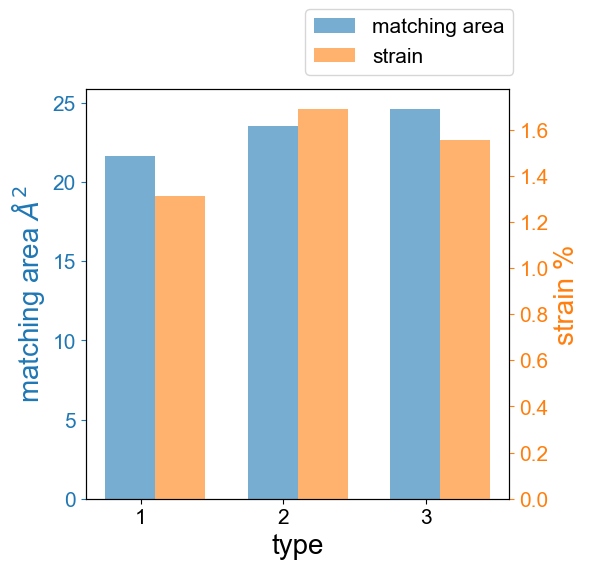

In [5]:
#Visualize matching information
iw.ems.plot_unique_matches() 

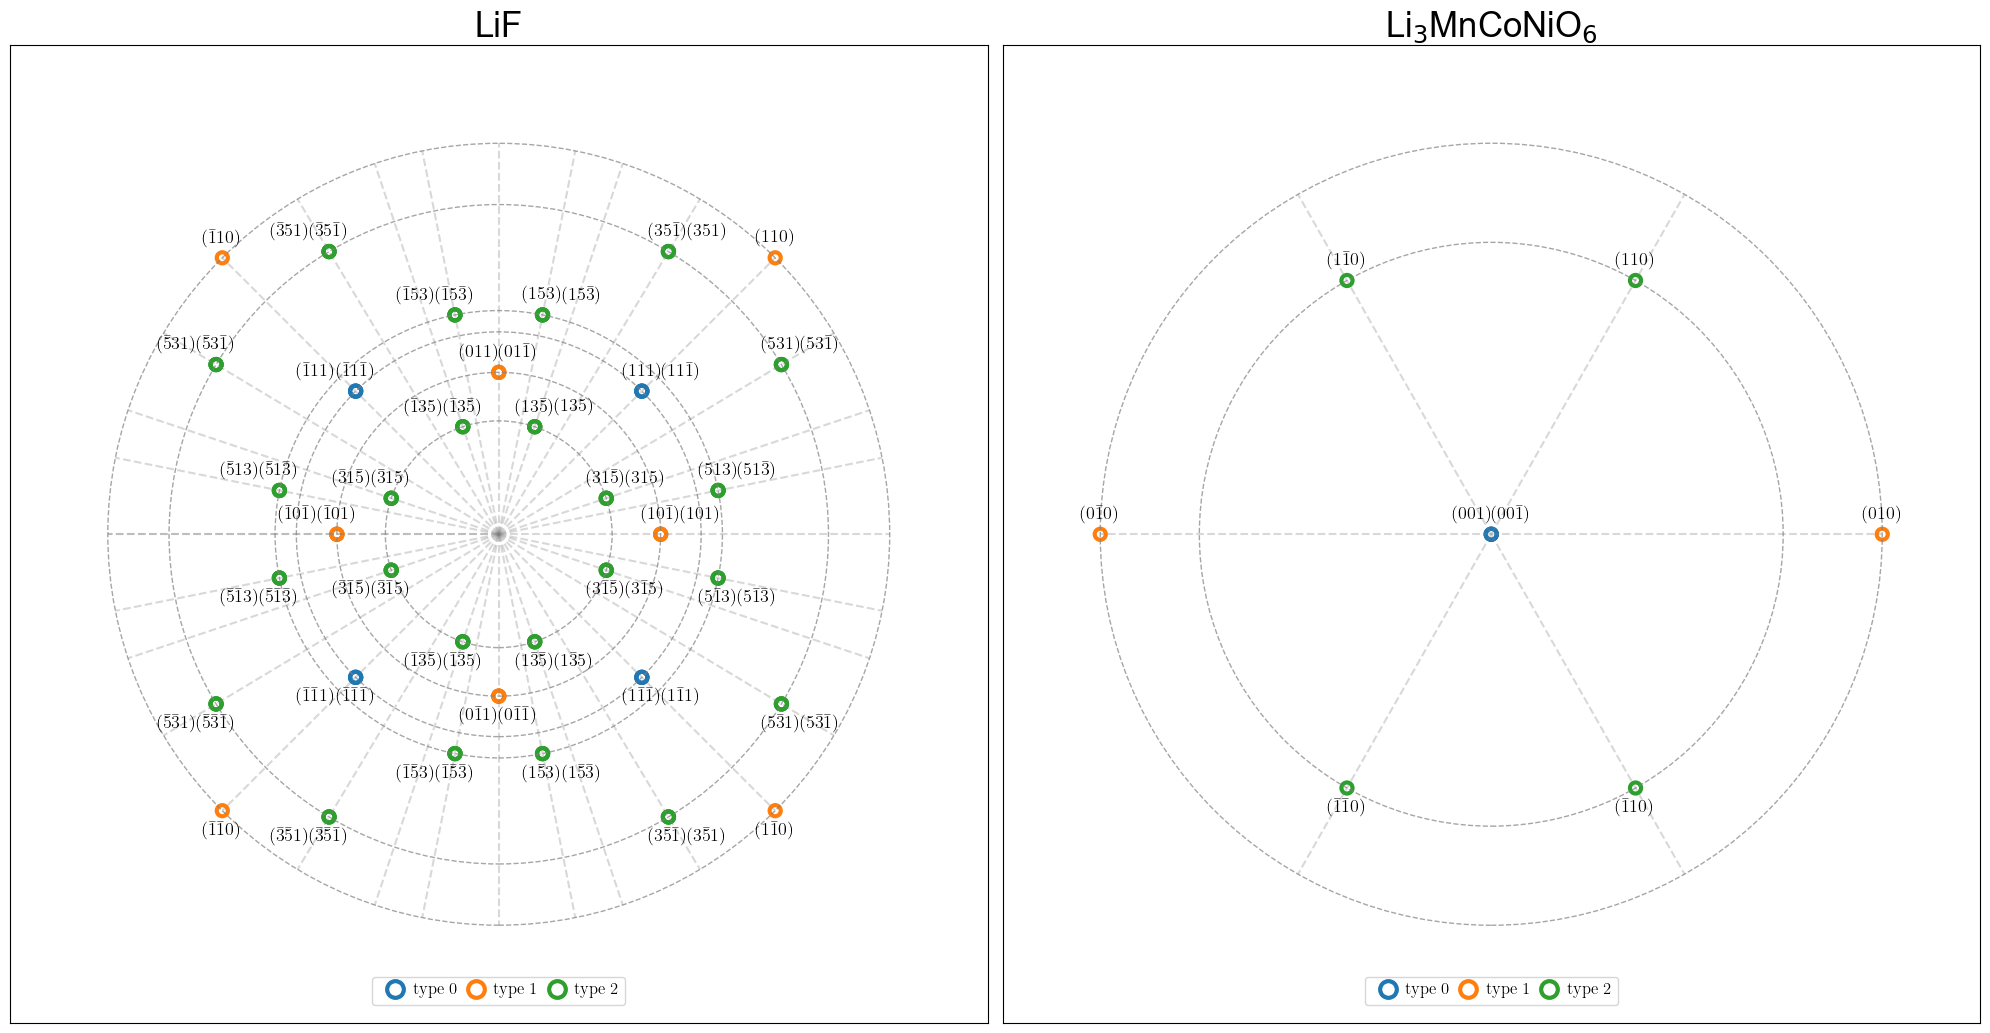

In [6]:
iw.ems.plot_matching_data(['LiF', 'Li$_3$MnCoNiO$_6$'],'project.jpg', show_millers = True, show_legend = True)

In [7]:
iw.parse_interface_structure_params(termination_ftol = 0.2, c_periodic = False, \
                                    vacuum_over_film = 12, film_thickness = 10, \
                                    substrate_thickness = 10, shift_to_bottom = True)

symmetry checking progress: 100%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

In [8]:
wf = iw.mlip_benchmark(['chgnet'], n_calls = 10,
                              project_name = 'NCM_LiF_bcmk', 
                                db_file = '/public5/home/t6s001944/.conda/envs/general/lib/python3.12/site-packages/atomate/config/db.json',
                                vasp_cmd = 'mpirun -np 96 vasp_std',
                                user_incar_settings={'NCORE':12}, 
                               work_dir = '/public5/home/t6s001944/InterOptimusPaper/mlip_benchmark/NCM_LiF/vasp')

default settings
{'device': 'cpu'}
crpi-aqvrppj8ebnguc34.cn-shenzhen.personal.cr.aliyuncs.com/jinlhr542/chgnet:0.0.1 container initializing...
Flask service is ready.
Performing initialization calculation ...
initialization completed


matches:   0%|          | 0/3 [00:00<?, ?it/s]

unique terminations:   0%|          | 0/8 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

unique terminations:   0%|          | 0/3 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

unique terminations:   0%|          | 0/24 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

registration optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/anaconda3/envs/3.12/lib/python3.12/site-packages/pymatgen/io/vasp/sets.py:276: BadInputSetWarning: Overriding the POTCAR functional is generally not recommended  as it significantly affects the results of calculations and compatibility with other calculations done with the same input set. Note that some POTCAR symbols specified in the configuration file may not be available in the selected functional.
  warnings.warn(


In [13]:
import pickle
with open('wf.pkl','wb') as f:
    pickle.dump(wf.to_dict(), f)

In [11]:
iw.global_optimized_data

$h_s$  $k_s$  $l_s$  $h_f$  $k_f$  $l_f$  $A$ (Å$^2$)  $\epsilon$  \
6       1      1      1      0      0      1    21.660651    0.013122   
1       1      1      1      0      0      1    21.660651    0.013122   
9       1      0     -1      0      1      0    23.581130    0.016934   
10      1      0     -1      0      1      0    23.581130    0.016934   
12      2      1     -2      1      1      0    24.661737    0.015550   
27      2      1     -2      1      1      0    24.661737    0.015550   
23      2      1     -2      1      1      0    24.661737    0.015550   
25      2      1     -2      1      1      0    24.661737    0.015550   
8       1      0     -1      0      1      0    23.581130    0.016934   
29      2      1     -2      1      1      0    24.661737    0.015550   
18      2      1     -2      1      1      0    24.661737    0.015550   
32      2      1     -2      1      1      0    24.661737    0.015550   
33      2      1     -2      1      1      0    24.661737    0.015550   
16      2      1     -2      1      1      0    24.661737    0.015550   
14      2      1     -2      1      1      0    24.661737    0.015550   
22      2      1     -2      1      1      0    24.661737    0.015550   
13      2      1     -2      1      1      0    24.661737    0.015550   
34      2      1     -2      1      1      0    24.661737    0.015550   
15      2      1     -2      1      1      0    24.661737    0.015550   
24      2      1     -2      1      1      0    24.661737    0.015550   
20      2      1     -2      1      1      0    24.661737    0.015550   
11      2      1     -2      1      1      0    24.661737    0.015550   
28      2      1     -2      1      1      0    24.661737    0.015550   
17      2      1     -2      1      1      0    24.661737    0.015550   
31      2      1     -2      1      1      0    24.661737    0.015550   
26      2      1     -2      1      1      0    24.661737    0.015550   
21      2      1     -2      1      1      0    24.661737    0.015550   
3       1      1      1      0      0      1    21.660651    0.013122   
30      2      1     -2      1      1      0    24.661737    0.015550   
19      2      1     -2      1      1      0    24.661737    0.015550   
4       1      1      1      0      0      1    21.660651    0.013122   
5       1      1      1      0      0      1    21.660651    0.013122   
2       1      1      1      0      0      1    21.660651    0.013122   
7       1      1      1      0      0      1    21.660651    0.013122   
0       1      1      1      0      0      1    21.660651    0.013122   

    $E_{it}$ $(J/m^2)$  $E_{bd}$ $(J/m^2)$  ...  $w_{f2}$ $u_{s1}$ $v_{s1}$  \
6            -0.138483           -5.429580  ...      -1/2       -1        0   
1             0.625886           -4.665211  ...      -1/2       -1        0   
9             1.100180           -0.833923  ...       1/2        1        0   
10            1.196710           -0.384265  ...       1/2        1        0   
12            1.327289           -0.970711  ...      -1/2      1/2     -1/2   
27            1.506304           -1.139198  ...      -1/2      1/2     -1/2   
23            1.589105           -1.036958  ...      -1/2      1/2     -1/2   
25            1.589459           -0.715143  ...      -1/2      1/2     -1/2   
8             1.643163           -0.257745  ...       1/2        1        0   
29            1.662248           -0.884133  ...      -1/2      1/2     -1/2   
18            1.684685           -1.328726  ...      -1/2      1/2     -1/2   
32            1.733575           -0.737495  ...      -1/2      1/2     -1/2   
33            1.742257           -0.793406  ...      -1/2      1/2     -1/2   
16            1.796813           -0.812656  ...      -1/2      1/2     -1/2   
14            1.930680           -0.867283  ...      -1/2      1/2     -1/2   
22            1.945156           -0.639398  ...      -1/2      1/2     -1/2   
13            1.958541          

In [1]:
iw.benchmk_dict['chgnet'][(0,6)]['best_it']['structure'].to_file('POSCAR')

NameError: name 'iw' is not defined